In [ ]:
!pip install transformers

In [ ]:
!pip install umap-learn

In [179]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from transformers import BertTokenizer, BertModel

I want to visualize the BERT embeddings for word "PRESENT" in 4 different meaning: 1) Gift 2) Present tense 3) Attend 4) Introduce; 
So I wrote 30 sentences for each meaning

In [180]:
present_gift = [["I gave her a Christmas present."],
                ["The birthday present was wonderful!"],
                ["Such a great present your dad gave me!"],
                ["Does this present belong to Sam?"],
                ["I will get my present in the birthday party."],
                ["I received a beautiful present from my best friend for my birthday."],
                ["It is always exciting to unwrap a present and see what is inside."],
                ["She bought a present for her sister's graduation."],
                ["I want to give my parents a special present for their anniversary."],
                ["The present was wrapped in shiny paper and tied with a bow."],
                ["He gave his girlfriend a present with a diamond necklace for Valentine's Day."],
                ["The child was thrilled with her Christmas present."],
                ["She felt grateful for the big present from her colleague."],
                ["He gave a present to his boss as a token of appreciation."],
                ["I wrapped the present with care to make it look pretty."],
                ["She opened the present with anticipation and excitement."],
                ["He received a present for his hard work on the project."],
                ["She forgot to bring a present to the baby's party."],
                ["The company gave the best employee of the month a valuable present."],
                ["His father gave her a house as her wedding present"],
                ["She wanted to give a meaningful present to her best friend."],
                ["He wil get a present for Teacher Appreciation Day."],
                ["The company gave him a present for his excellent performance."],
                ["The children make a present for their teacher for the end of the school year."],
                ["She received a present in the mail from her distant cousin."],
                ["He wrapped the present in newspaper because he ran out of wrapping paper."],
                ["The couple buy present for their first wedding anniversary."],
                ["She regretted not buying a present for her friend's engagement party."],
                ["He gave his girlfriend a bouquet of flowers as a present for no special occasion."],
                ["The present was too big to fit in the car, so they had to tie it to the roof."]]


present_now = [["She did not expect to find herself here at present."],
               ["Past, present and future are just in our mind."],
               ["To talk about our current situation, we should use present tense."],
               ["We can change the future by working hard in the present."],
               ["They are happy and at peace, refusing to think beyond the present"],
               ["I am not able do it at present time."],
               ["The present moment is all that matters."],
               ["I am currently in the present, but my mind is in the future."],
               ["The present time is challenging, but we will overcome it."],
               ["Let's focus on the present and not worry about the future."],
               ["The present time is a good opportunity to learn new skills."],
               ["At present, I am working on a new project."],
               ["The state of the economy is uncertain at present."],
               ["Let's enjoy the present and not worry about the future."],
               ["At present, I am not sure what I want to do with my life."],
               ["You only need to think about present time."],
               ["At the present moment, the situation demands immediate action."],
               ["We must live in the present and not dwell on the past."],
               ["My mom need me at present, not tomorrow!"],
               ["Let's make the most of the present moment and cherish it."],
               ["Our present moment is the result of our past days."],
               ["We should focus on the present moment instead of worrying about the future."],
               ["I wish I could stop the present moment."],
               ["At present time, I am unable to answer your question."],
               ["At present moment, the state of the environment is a cause for concern."],
               ["We should use our present time in proper way."],
               ["At present, the pandemic has changed the world in many ways."],
               ["We must live in the present but plan for the future."],
               ["At present, the situation is not what we had envisioned."],
               ["Let's talk about our present, not the future."]]


present_attend = [["A doctor must be present at the hospital."],
                  ["We present at a conference about success."],
                  ["He present at the meeting lately."],
                  ["Will you present at the meeting on time?"],
                  ["We present at the seance so soon."],
                  ["I will be present at the meeting tomorrow."],
                  ["He was unable to be present at his son's graduation."],
                  ["All attendees are required to be present for the entire workshop."],
                  ["She always makes sure to be present for her friend's important events."],
                  ["The speaker will be present at the conference to answer questions."],
                  ["It is important to be present at the office during business hours."],
                  ["We need everyone to be present at the rehearsal tomorrow."],
                  ["You must be present at the office."],
                  ["The CEO will be present at the company's annual meeting."],
                  ["The judge expects all witnesses to be present at the court."],
                  ["He wasn't present at the cinema for the beginning of the movie."],
                  ["All students are expected to be present at school."],
                  ["She made sure to be present at her daughter's school play."],
                  ["We need at least 90% of the team to be present for the game to start."],
                  ["The committee requires all members to be present at the assembly."],
                  ["The guest speaker will be present at the event to give a keynote address."],
                  ["We are looking forward to having you present at the conference."],
                  ["It is crucial to be present at the hearing to defend your case."],
                  ["She was disappointed to find out she was not present at her friend's wedding."],
                  ["He was happy to be present at the charity event."],
                  ["The coach reminded the team to be present at the stadium."],
                  ["We are pleased to have you present at the meeting to provide your expertise."],
                  ["She was surprised to see her ex-boyfriend present at the party."],
                  ["All shareholders must be present at the annual general meeting."],
                  ["We hope you will be present at our event to share your ideas and collaborate with us."]]


present_introduce = [["May I present my wife?"],
                     ["When you enter a new group, you should present yourself first."],
                     ["To present herself, she start to talk about her childhood."],
                     ["Professor present his course with a loud voice."],
                     ["The little girl present her mother to her friends."],
                     ["Allow me to present our guest speaker for today's event."],
                     ["I would like to present our new product line to the board of directors."],
                     ["May I present our CEO, John Smith."],
                     ["Let me present you to my colleague from the marketing department."],
                     ["It is my pleasure to present our company's mission and values."],
                     ["I'd like to present our team's findings from the research project."],
                     ["May I present my latest project to the class."],
                     ["Allow me to present our new intern, Jane Doe."],
                     ["I'm excited to present my proposal for the new marketing campaign."],
                     ["Let me present our hero to the world."],
                     ["May I present our company's new achievements."],
                     ["I'd like to present our team's innovative solution to the problem."],
                     ["They present the new coach of the team"],
                     ["Allow me to present our client with the final product."],
                     ['I would like to present the new employee handbook to the staff.'],
                     ["Let me present our company's CEO to you."],
                     ["May I present our new website?"],
                     ["I'm thrilled to present the new member of our team"],
                     ["Allow me to present you to our friends."],
                     ["I would like to present the new couple of our family."],
                     ["Let me present our company's financial performance for the year."],
                     ["May I present our new software solution to the IT department."],
                     ["I'd like to present the project timeline and milestones to the client."],
                     ["It is my pleasure to present our team to the investors."],
                     ["Allow me to present the new speaker for the conference."]]

I used Hugging face Bert tokenizer & model to get BERT representation for my words.

In [181]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Set model in evaluation mode to just use it's predictions.

In [182]:
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

Here we have a function with these steps:
1) First, it get 5 arguments: our sentences list contains 30 sentences in one specific meaning of the desired word, our desired word, our tokenizer, our model and the hidden layer in the Bert which we want to get it's embedding representaions.
2) Biuld a 30 x 768 matrix, as our lists contain 30 sentences and BERT's embedding is 768D (one 768D representation vector for 'present' in each of those 30 sentences in the sentences list).
3) Then it goes through our sentences list and tokenize each sentence. For each sentence, we have a dictionary contains input ids and attention masks of the words of our sentence. We will convert input ids and masks to torch tensor to give it to the model. Then it decode input ids to see where our desired word is in the tokenized sentence and after finding it in a for loop, put it's index in the 'my_idx' variable.
4) We use no_grad to prevent the model from updating its weights and then give the input ids and attention masks to the model and obtain its hidden states output. The hidden state output contains all 12 hidden states, each of which consists of a (len(tokens in sentence), 768) matrix. Therefore, we can choose any of these 12 hidden state as our final embedding (Based on the paper, 9th layer give the best representation).
5) As we need the representation of 'present' word in the sentence, we choose that one based on 'present' index (=my_idx) in that sentence and put the vector in the 30 x 768 matrix (based on the sentence position in the sentences list, ex. representation of 'present' in the first sentence, will sit in the first row of the embedding matrix and so on).

In [183]:
def getBertEmbegging(word_mean, my_word, tokenizer, model, hidden_layer):
  embedding_mat = np.zeros((30, 768))
  for sent_inx in range(len(word_mean)):
    ids_masks = tokenizer(word_mean[sent_inx])
    input_ids = torch.tensor(ids_masks['input_ids'])
    masks = torch.tensor(ids_masks['attention_mask'])
    decoded_tokens = tokenizer.decode(ids_masks['input_ids'][0])
    tokens = tokenizer.tokenize(decoded_tokens)
    for i in range(len(tokens)):
      if tokens[i] == my_word:
        my_idx = i
    with torch.no_grad():
      hidden_states = model(input_ids, attention_mask=masks).hidden_states
      token_embeddings = torch.stack(hidden_states, dim=0)
      token_embeddings = torch.squeeze(token_embeddings, dim=1)
      token_embeddings = token_embeddings[hidden_layer-1, my_idx, :]
    embedding_mat[sent_inx] = token_embeddings
  return embedding_mat

Make embedding matrices for each sentences list. Each matrix includes 30 representations of word 'present' in the same meaning (gift, now, attend or introduce)

In [184]:
gift = getBertEmbegging(present_gift, 'present', tokenizer, model, 9)
now = getBertEmbegging(present_now, 'present', tokenizer, model, 9)
attend = getBertEmbegging(present_attend, 'present', tokenizer, model, 9)
introduce = getBertEmbegging(present_introduce, 'present', tokenizer, model, 9)

Now, we concat all these matrices and set a label from 0 to 3 for each meaning.

In [185]:
BERT_emb_list = np.concatenate((gift, now, attend, introduce))
labels = np.zeros((len(BERT_emb_list),))
labels[:31] = 0
labels[31:61] = 1
labels[61:91] = 2
labels[91:] = 3

Dimensionality reduction with PCA and UMAP (for visualizing)

In [186]:
pca3 = PCA(3, random_state=0)
bert_pca = pca3.fit_transform(BERT_emb_list)

umap3 = UMAP(n_components=3, n_neighbors=10, random_state=42)
bert_umap = umap3.fit_transform(BERT_emb_list)

min_max = MinMaxScaler()
scaled_bert_pca = min_max.fit_transform(bert_pca)
scaled_bert_umap = min_max.fit_transform(bert_umap)

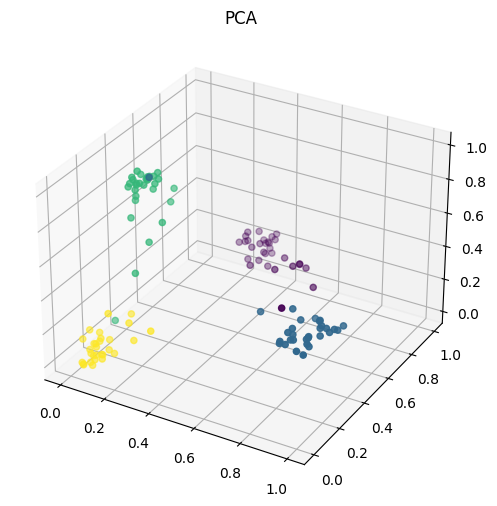

In [187]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection ="3d")
ax.scatter3D(scaled_bert_pca[:,0], scaled_bert_pca[:,1], scaled_bert_pca[:,2], c=labels)
plt.title("PCA")
plt.show()

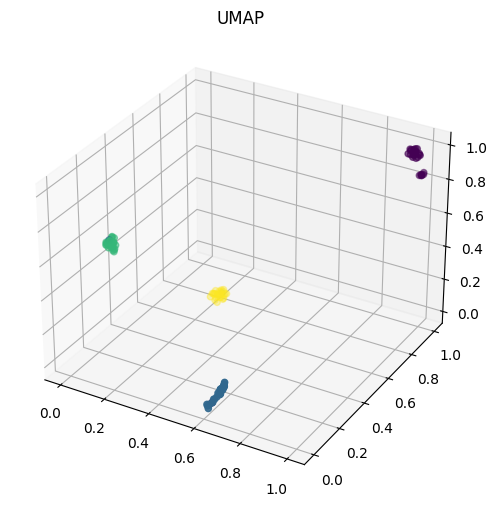

In [188]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection ="3d")
ax.scatter3D(scaled_bert_umap[:,0], scaled_bert_umap[:,1], scaled_bert_umap[:,2], c=labels)
plt.title("UMAP")
plt.show()

Use Kmeans unsupervised algorithm for clustering words based on their representations.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


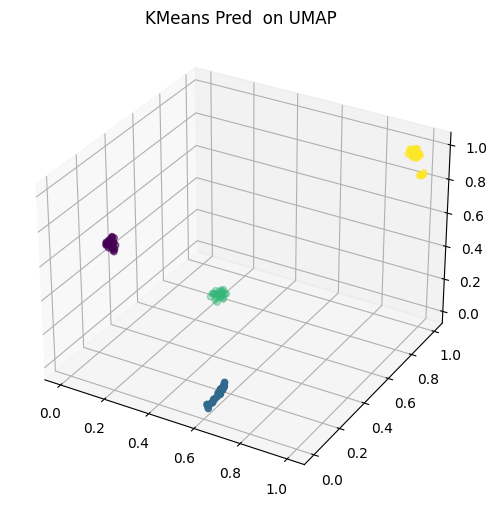

In [189]:
kmeans = KMeans(4)
kmeans.fit(BERT_emb_list)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection ="3d")
ax.scatter3D(scaled_bert_umap[:,0], scaled_bert_umap[:,1], scaled_bert_umap[:,2], c=kmeans.labels_)
plt.title("KMeans Pred  on UMAP")
plt.show()

*As you can see in these three graphs, the embeddings provided by BERT for words are completely contextual and differ from one sentence to another. Additionally, the embeddings for words with the same meaning are close to each other.*